In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
dat = pd.read_csv("../data/bike-hour.csv")
dat = dat.drop(["season","atemp","yr","mnth","holiday","weekday","workingday", "weathersit"], axis=1)

In [3]:
dat

,instant,dteday,hr,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,0,0.24,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0.22,0.80,0.0000,8,32,40
2,3,2011-01-01,2,0.22,0.80,0.0000,5,27,32
3,4,2011-01-01,3,0.24,0.75,0.0000,3,10,13
4,5,2011-01-01,4,0.24,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,19,0.26,0.60,0.1642,11,108,119
17375,17376,2012-12-31,20,0.26,0.60,0.1642,8,81,89
17376,17377,2012-12-31,21,0.26,0.60,0.1642,7,83,90
17377,17378,2012-12-31,22,0.26,0.56,0.1343,13,48,61


In [4]:
dat.temp = (dat.temp * 47) - 8
dat.temp

0        3.28
1        2.34
2        2.34
3        3.28
4        3.28
         ... 
17374    4.22
17375    4.22
17376    4.22
17377    4.22
17378    4.22
Name: temp, Length: 17379, dtype: float64

<AxesSubplot:>

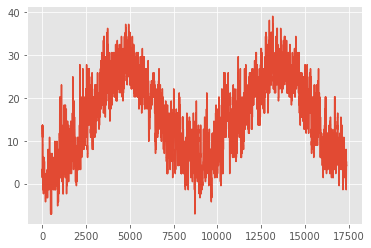

In [5]:
dat.temp.plot()

In [6]:
dat.hum = dat.hum * 100
dat.hum

0        81.0
1        80.0
2        80.0
3        75.0
4        75.0
         ... 
17374    60.0
17375    60.0
17376    60.0
17377    56.0
17378    65.0
Name: hum, Length: 17379, dtype: float64

In [7]:
dat.windspeed = dat.windspeed * 67
dat.windspeed

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
17374    11.0014
17375    11.0014
17376    11.0014
17377     8.9981
17378     8.9981
Name: windspeed, Length: 17379, dtype: float64

In [8]:
dat["dtetime"] = pd.to_datetime(dat.dteday) + pd.to_timedelta(dat.hr, unit='h')
dat.dtetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: dtetime, Length: 17379, dtype: datetime64[ns]

In [9]:
dat = dat.drop(["dteday", "instant", "hr"], axis=1)

In [10]:
dat.to_csv("../data/bike-hour-raw.csv", index=False)

In [11]:
dat = pd.read_csv("../data/bike-hour-raw.csv")
dat

,temp,hum,windspeed,casual,registered,cnt,dtetime
0,3.28,81.0,0.0000,3,13,16,2011-01-01 00:00:00
1,2.34,80.0,0.0000,8,32,40,2011-01-01 01:00:00
2,2.34,80.0,0.0000,5,27,32,2011-01-01 02:00:00
3,3.28,75.0,0.0000,3,10,13,2011-01-01 03:00:00
4,3.28,75.0,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...
17374,4.22,60.0,11.0014,11,108,119,2012-12-31 19:00:00
17375,4.22,60.0,11.0014,8,81,89,2012-12-31 20:00:00
17376,4.22,60.0,11.0014,7,83,90,2012-12-31 21:00:00
17377,4.22,56.0,8.9981,13,48,61,2012-12-31 22:00:00
